# Chapter IV

## Creating and Visualizing DataFrames

### Visualizing your data

Plots are a powerful way to share the insights you've gained from your data.

#### Histograms

We'll need to import matplotlib.pyplot as plt in order to display our visualizations.  
```python
import matplotlib.pyplot as plt
```

We can create a histogram of the height variable by selecting the column and calling **.hist()**

```python
dog_pack["height_cm"].hist()
```

In order to show the histogram we need to call :  

```python
plt.show()
```
##### "bins" Argument

We can adjust the number of bars, or bins, using the **"bins"** argument.  
Increasing or decreasing this can give us a better idea of what the distrubition looks like.  

```python 
dog_pack["height_cm"].hist(bins=20)
plt.show()
```

```python
dog_pack["height_cm"].hist(bins=5)
plt.show()
```

#### Bar plots

Bar plots can reveal relationships between a categorical variable and a numeric variable, like breed and weight.  
To compute the average weight of each breed, we group by breed, select the weight column, and take the mean, giving us the average weight of each breed.

```pyhton
avg_weight_by_breed = dog_pack.groupby("breed")["weight_kg"].mean()
print(avg_weight_by_breed)
```
![bar_Plot](.\datasets\Bar_Plot.png)

Now we can create a bar plot from the mean weights using plot method, setting **"kind"** equal to **"bar"**.

```python
avg_weight_by_breed.plot(kind="bar")
plt.show()
```

![Bar_plot](.\datasets\Breed.png)

We can also add title with **"title"** argument:

```python
avg_weight_by_breed.plot(kind="bar", title="Mean Weight by Dog Breed")
plt.show()
```

![Title](.\datasets\Breed_Title.png)

#### Line plots

Line plots are great for visualizing changes in numeric variables over time.  
This time we pass three arguments: date as x, weight as y, and "kind" equals **"line"**

```python
sully.plot(x="date",
           y= "weight_kg",
           kind="line")
            
plt.show()
```

![Line_Plot](.\datasets\Line_Plot.png)

##### Rotating axis labels

In order to rotate the x-axis labels to make the text easier to read, we can pass an argument **"rot"**

#### Scatter Plots

Scatter plots are great for visualizing relationships between two numeric variables.  
We simply pass **"scatter"** to the argument **"kind"**

```python
dog_pack.plot(x="height_cm", y="weight_kg", kind="scatter")
plt.show()
```

![ScatterPlot](.\datasets\Scatter_Plot.png)

### Layering Plots

We can also put layers on top of another. For example we can create a histogram of female dogs' heights, and put a histogram of male dogs'' heights on top.

```python
dog_pack[dog_pack["sex"] == "F"]["height_cm"].hist()
dog_pack[dog_pack["sex"] == "M"]["height_cm"].hist()
plt.show()
```

We can also add a legend to make it more easy to read:

```python
plt.legend(["F", "M"])
plt.show()
```

We can also adjust the transparency, alpha = 0.0 being transparent and 1.0 being opaque :

```python
dog_pack[dog_pack["sex"] == "F"]["height_cm"].hist(alpha=0.7)
dog_pack[dog_pack["sex"] == "M"]["height_cm"].hist(alpha=0.7)
plt.legen(["F", "M"])
plt.show()
```

![Layering](.\datasets\layering.png)



         date          type  year  avg_price   size     nb_sold
0  2015-12-27  conventional  2015       0.95  small  9626901.09
1  2015-12-20  conventional  2015       0.98  small  8710021.76
2  2015-12-13  conventional  2015       0.93  small  9855053.66
3  2015-12-06  conventional  2015       0.89  small  9405464.36
4  2015-11-29  conventional  2015       0.99  small  8094803.56


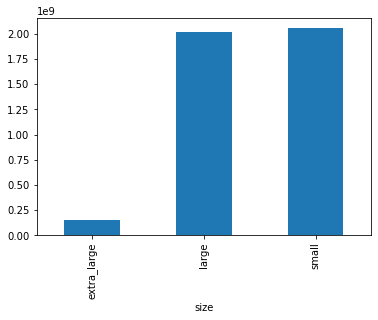

In [2]:
import pandas as pd 

avocados = pd.read_pickle("datasets\\avoplotto.pkl")

# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

# Look at the first few rows of data
print(avocados.head())

# Get the total number of avocados sold of each size
nb_sold_by_size = avocados.groupby("size")["nb_sold"].sum()

# Create a bar plot of the number of avocados sold by size
nb_sold_by_size.plot(kind="bar")
# Show the plot
plt.show()

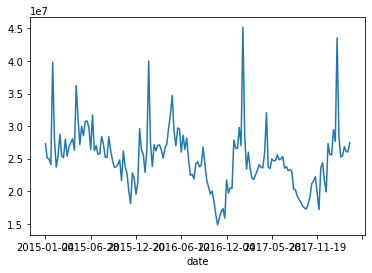

In [3]:
# get the total number of avocados sold on each date
nb_sold_by_date = avocados.groupby("date")["nb_sold"].sum()
# Create a line plot of the number of avocados sold by date
nb_sold_by_date.plot(x="date",
                     y="nb_sold",
                     kind="line")
# Show the plot
plt.show()

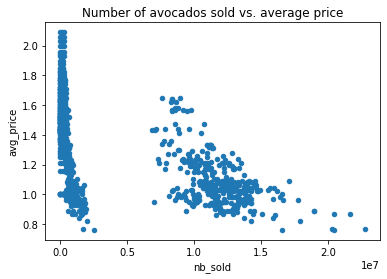

In [4]:
# Scatter plot of avg_price vs. nb_sold with title
avocados.plot(x="nb_sold", y="avg_price", kind="scatter",title="Number of avocados sold vs. average price")
# Show the plot
plt.show()

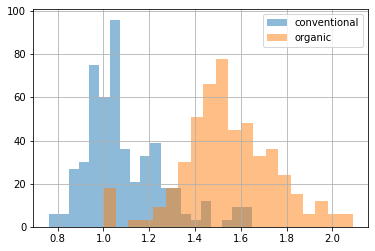

In [5]:
# Histogram of conventional avg_price and transparency to 0.5, bins to 20
avocados[avocados["type"] == "conventional"]["avg_price"].hist(alpha=0.5, bins=20)
# Histogram of organic avg_price and transparency to 0.5, bins to 20
avocados[avocados["type"] == "organic"]["avg_price"].hist(alpha=0.5, bins=20)
# Add a legend
plt.legend(["conventional","organic"])
# Show the plot
plt.show()

### Missing Values

You could be given a DataFrame that has missing values, so it's important to know how to handle them.

In pandas DataFrame, missing values are indicated with N-a-N, which stands for **"not a number"**

When you first get a DataFrame, it's a good idea to get a sense of whether it contains any missing values, and if so, how many. That's where the **isna()** method comes in.

When we call .isna() on a DataFrame, we get a Boolean for every single value indicating whether the value is missing or not, but this isn't very helpful when you're working with a lot of data.

If we chain **.isna()** with **.any()**, we get one value for each variable that tells us if there are any missing values in that column.

Since taking sum of Booleans is the same thing as counting the number of Trues, we can combine sum with **isna().sum()**, therefore, we'll count the number of NaNs in each column.

We can also use those counts to visualize the missing values in the dataset using a bar plot. **dogs.isna().sum().plot(kind="bar")**

#### Removing missing values

One option is to remove the rows in the DataFrame that contains missing values. This can be done using **.dropna()** method. However this may not be ideal if you have a lot of missing data.

Another option is to replace missing values with another value. The **.fillna(value)** method takes in a value, and all NaNs will be replaced with this value.


       date   type   year  avg_price   size  nb_sold
0     False  False  False      False  False    False
1     False  False  False      False  False    False
2     False  False  False      False  False    False
3     False  False  False      False  False    False
4     False  False  False      False  False    False
...     ...    ...    ...        ...    ...      ...
1009  False  False  False      False  False    False
1010  False  False  False      False  False    False
1011  False  False  False      False  False    False
1012  False  False  False      False  False    False
1013  False  False  False      False  False    False

[1014 rows x 6 columns]
date         False
type         False
year         False
avg_price    False
size         False
nb_sold      False
dtype: bool


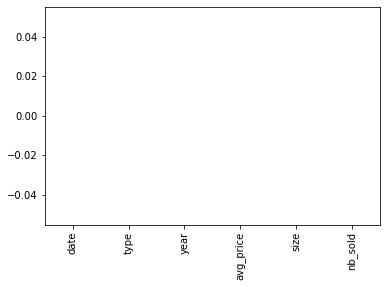

In [8]:
# Check individual values for missing values
print(avocados.isna())
# Check each column for missing values
print(avocados.isna().any())
# Bar Plot of missing values by variable
avocados.isna().sum().plot(kind="bar")
# Show plot
plt.show()

In [9]:
# Remove rows with missing values
avocados_complete = avocados.dropna()
# Check if any columns contains missing values
print(avocados_complete.isna().any())

date         False
type         False
year         False
avg_price    False
size         False
nb_sold      False
dtype: bool


### Creating DataFrames

There are many ways to create DataFrames from scratch, but we'll discuss two ways: **from a list of dictionaries** and **from a dictionary of lists**

In the first method, the DataFrame is built up row by row, while in the second method, the DataFrame is built up column by column.

#### List of dictionaries (By row)

```python
list_of_dicts = [
    {"name": "Ginger", "breed": "Dachshund", "height_cm": 22,                             
    "weight_kg": 10, "date_of_birth": "2019-03-14"},
    {"name": "Scout", "breed": "Dalmatian", "height_cm": 59,
    "weight_kg": 25, "date_of_birth": "2019-05-09"}
]

new_dogs = pd.DataFrame(list_of_dicts)
```

#### Dictionary of lists (By Column)

```python
dict_of_lists = {
    "name": ["Ginger", "Scout"],
    "breed":["Dachshund", "Dalmatian"],
    "height_cm": [22, 59],
    "Weight_kg": [10, 25],
    "date_of_birth": ["2019-03-14", "2019-05-09"]
}

new_dogs = pd.DateFrame(dict_of_lists)
```

In [10]:
# Create a list of dictionaries with new data
avocados_list = [
    {"date": "2019-11-03", "small_sold": 10376832, "large_sold": 7835071},
    {"date": "2019-11-10", "small_sold": 10717154, "large_sold": 8561348}
]
# Conver list into DataFrame
avocados_2019 = pd.DataFrame(avocados_list)
# Print the new DataFrame
avocados_2019

,date,small_sold,large_sold
0,2019-11-03,10376832,7835071
1,2019-11-10,10717154,8561348


In [11]:
# Create a dictionary of lists with new data
avocados_dict = {
    "date": ["2019-11-03", "2019-11-10"],
    "small_sold": [10376832, 10717154],
    "large_sold": [7835071, 8561348]
}
# Convert dictionary into DataFrame
avocados_2019 = pd.DataFrame(avocados_dict)
# Print the new DataFrame
avocados_2019

,date,small_sold,large_sold
0,2019-11-03,10376832,7835071
1,2019-11-10,10717154,8561348


### Reading and Writing CSVs

CSV, or comma-seperated values, is a common data storage file type.

We can put CSV files into  a DataFrame using pandas function **.read_csv(file_name)**

```python
import pandas as pd 
new_dogs = pd.read_csv("new_dogs.csv")
```

We can also manipulate this DataFrame

```python
new_dogs["bmi"] = new_dogs["weight_kg"] / (new_dogs["height_cm"] / 100) ** 2
```

We can upload this upgraded DataFrames into a new CSV file

```python
new_dogs.to_csv("new_dogs_with_bmi.csv")
```